<a href="https://colab.research.google.com/github/Ferdiki/MachineLearning/blob/main/UTS1_G_231_21_0009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Pustaka
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
# Pustaka Visualisasi
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn
# Integrasi Google Colab dan Pengunggahan File
from google.colab import files
uploader = files.upload()

Saving CADdataset.csv to CADdataset (3).csv


In [ ]:
# Membaca dan Menampilkan Lima baris pertama Data
df= pd.read_csv('CADdataset.csv')
df.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal


In [ ]:
# Membaca, Menghapus, Mengganti Nama Kolom Sex menjadi Sex_female
disease_df = pd.read_csv("CADdataset.csv")
disease_df.drop(['Age'], inplace=True, axis= 1)
disease_df.rename (columns = {'Sex': 'Sex_Fmale'}, inplace = True)
# Menghapus baris nilai NaN / NULL dan menampilkan jumlah nilai pada colom CAD
disease_df.dropna (axis = 0, inplace=True)
print (disease_df.head(), disease_df.shape)
print(disease_df.CAD.value_counts())

   Weight  Height Sex_Fmale        BMI  DM  HTN  Current Smoker Obesity DLP  \
0      90     175      Male  29.387755   0    1               1       Y   Y   
1      70     157     Fmale  28.398718   0    1               0       Y   N   
2      54     164      Male  20.077335   0    0               1       N   N   
3      67     158     Fmale  26.838648   0    1               0       Y   N   
4      87     153     Fmale  37.165193   0    1               0       Y   N   

    BP  ... LVH  PRP  FBS ESR  EF   RWMA EX-Smoker   CR  BUN     CAD  
0  110  ...   N    N   90   7  50      0         0  0.7    8     Cad  
1  140  ...   N    N   80  26  40      4         0  1.0   30     Cad  
2  100  ...   N    N   85  10  40      2         0  1.0   17     Cad  
3  100  ...   N    N   78  76  55      0         0  1.2   30  Normal  
4  110  ...   N    N  104  27  50      0         0  1.0   16  Normal  

[5 rows x 26 columns] (303, 26)
Cad       216
Normal     87
Name: CAD, dtype: int64


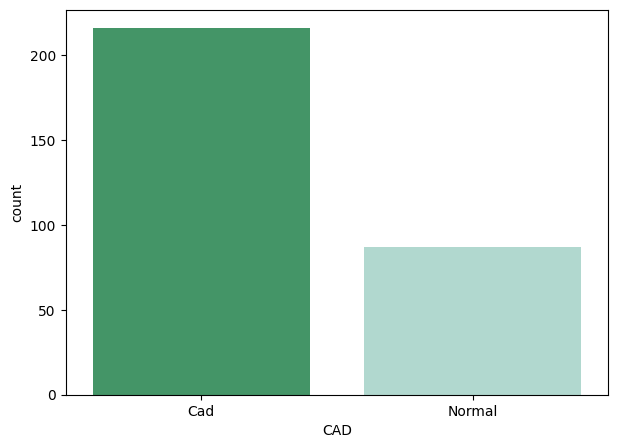

In [ ]:
# Menghitung Jumlah pasien yang terkena CAD dan menampilkan dalam bentuk grafik
plt.figure(figsize=(7, 5))
sn.countplot(x='CAD', data=disease_df,
             palette="BuGn_r")
plt.show()

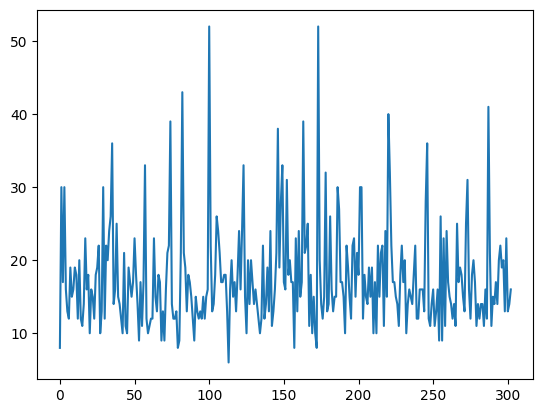

In [ ]:
# Membuat plot garis dari kolom BUN dan Menampilkan Plot
laste = disease_df['BUN'].plot()
plt.show(laste)

In [ ]:
# Mengambil data Independen dan Dependen
X = np.asarray(disease_df[['Weight', 'Height', 'BMI',
                          'FBS', 'ESR', 'EF']])
y = np.asarray(disease_df['EX-Smoker'])
# normalisasi dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
# pembagian Dataset Menjadi data Latih dan data Uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 4)
# Menampilkan Ukuran data Latih dan Data Uji
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (212, 6) (212,)
Test set: (91, 6) (91,)


In [ ]:
# Membuat objek model regresi logistik
from sklearn.linear_model import LogisticRegression
# Melatih model pada data latih
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# menggunakan model untuk memprediksi data uji
y_pred = logreg.predict(X_test)
# Evaluasi dan menghitung akurasi
from sklearn.metrics import jaccard_score
print('')
print('Accuracy of the model in jaccard similarity score is = ',
      jaccard_score (y_test, y_pred))


Accuracy of the model in jaccard similarity score is =  0.0


In [ ]:
# Import Modul dan Membuat Objek Model Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Melatih Model pada Data Latih
rf.fit(X_train, y_train)
# Menggunakan Model untuk Memprediksi Data Uji dan Menghitung Akurasi
score = rf.score(X_test,y_test)*100
print('Accuracy of the model is = ', score)

Accuracy of the model is =  94.5054945054945


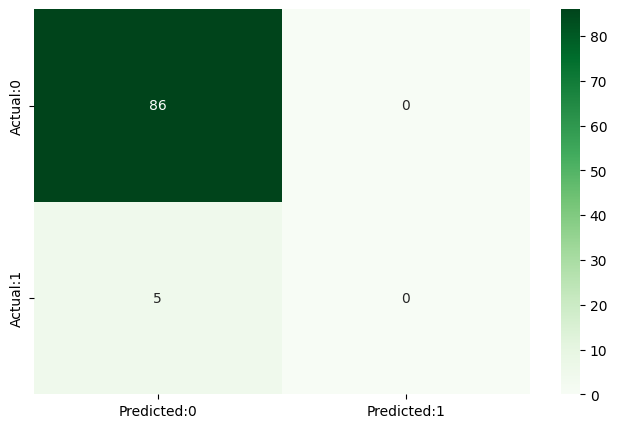

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        86
           1       0.00      0.00      0.00         5

    accuracy                           0.95        91
   macro avg       0.47      0.50      0.49        91
weighted avg       0.89      0.95      0.92        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Import Modul untuk Matriks dan Laporan Klasifikasi:
from sklearn.metrics import confusion_matrix, classification_report
# Menghitung Matriks Kebingungan
cm = confusion_matrix(y_test, y_pred)
# Membuat DataFrame untuk Matriks dan Menampilkan sebagai Heatmap
conf_matrix = pd.DataFrame(data = cm,
                             columns = ['Predicted:0', 'Predicted:1'],
                             index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
# Menampilkan Laporan Klasifikasi
print('The details for confusion matrix is =')
print (classification_report (y_test, y_pred))